Binary with Spots
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Model without Spots
--------------------------

In [3]:
b.add_dataset('lc', times=phoebe.linspace(0,1,101))

<ParameterSet: 73 parameters | contexts: dataset, figure, constraint, compute>

In [4]:
b.run_compute(irrad_method='none', model='no_spot')

100%|██████████| 101/101 [00:01<00:00, 83.98it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

Adding Spots
---------------------

Let's add a spot to the primary component in our binary.

The 'colat' parameter defines the colatitude on the star measured from its North (spin) Pole.  The 'long' parameter measures the longitude of the spot - with longitude = 0 being defined as pointing towards the other star at t0.  See the [spots tutorial](../tutorials/spots.ipynb) for more details.

In [5]:
b.add_feature('spot', component='primary', feature='spot01', relteff=0.9, radius=30, colat=45, long=90)

<ParameterSet: 5 parameters | contexts: feature, compute>

In [6]:
b.run_compute(irrad_method='none', model='with_spot')

100%|██████████| 101/101 [00:03<00:00, 29.65it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

Comparing Light Curves
------------------------------

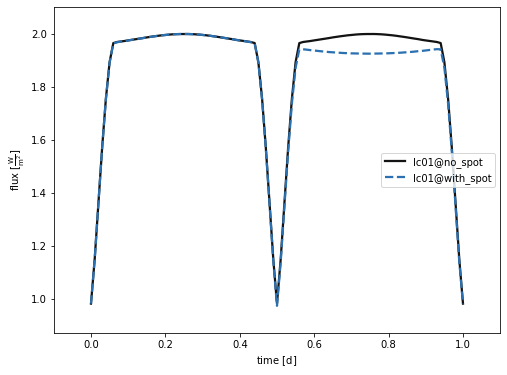

In [7]:
afig, mplfig = b.plot(show=True, legend=True)